# Classificação da capacidade de pagamento dos municípios brasileiros com base em dados geoeconômicos
# Notebook 02 - Tratamento de dados e análise exploratória
Autores: Camila, Mario, Cruz

## 1 Importação das bibliotecas

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Alarme que avisa quando o código termina
import winsound

### 1.2 Configurações iniciais

In [256]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Referências

Balanceamento de base - Smote
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [257]:
#carrega os dados da base única (resultado da junção das bases "PIB" e "CAPAG")
#df = pd.read_excel('dt_unico_tcc.xlsx')
df = pd.read_excel('dt_unico.xlsx')
df.shape

(5570, 22)

In [258]:
#visualiza entradas
df.head(2)

,Região,UF,Município,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,Amazônia_Legal,Semiárido,Cid_Região_São_Paulo,VAB_AGR,VAB_IND,VAB_SERV,VAB_AD_DF_ED_SP_SS,VAB_TOT,IMP_PROD,PIB_per_capita,População,Capag
0,Norte,Rondônia,Alta Floresta D'Oeste,0,do Entorno,do Entorno,Miss,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,21552.470,23167,NaN
1,Norte,Rondônia,Ariquemes,0,Polo,do Entorno,Miss,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,Sim,Não,Não,163120.731,339667.233,1034183.951,674541.006,2211512.920,252260.341,23206.360,106168,A


In [259]:
df = df.set_index("Município")
df.head(2)

,Região,UF,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,Amazônia_Legal,Semiárido,Cid_Região_São_Paulo,VAB_AGR,VAB_IND,VAB_SERV,VAB_AD_DF_ED_SP_SS,VAB_TOT,IMP_PROD,PIB_per_capita,População,Capag
Município,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,Norte,Rondônia,0,do Entorno,do Entorno,Miss,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,21552.470,23167,NaN
Ariquemes,Norte,Rondônia,0,Polo,do Entorno,Miss,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,Sim,Não,Não,163120.731,339667.233,1034183.951,674541.006,2211512.920,252260.341,23206.360,106168,A


In [260]:
df.isna().sum()

Região                           0
UF                               0
Reg_Metropolitana                0
Mun_Reg_Geog_Imediata            0
Mun_Reg_Geog_Intermediária       0
Tipo_Conc_Urbana                 0
Hierarquia_Urbana                0
Hier_Urbana_princ_categ          0
Região_rural                     0
Amazônia_Legal                   0
Semiárido                        0
Cid_Região_São_Paulo             0
VAB_AGR                          0
VAB_IND                          0
VAB_SERV                         0
VAB_AD_DF_ED_SP_SS               0
VAB_TOT                          0
IMP_PROD                         0
PIB_per_capita                   0
População                        0
Capag                         1152
dtype: int64

In [261]:
#verificando se temos valores duplicados
df.duplicated().sum()

0

In [262]:
df.head(2)

,Região,UF,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,Amazônia_Legal,Semiárido,Cid_Região_São_Paulo,VAB_AGR,VAB_IND,VAB_SERV,VAB_AD_DF_ED_SP_SS,VAB_TOT,IMP_PROD,PIB_per_capita,População,Capag
Município,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,Norte,Rondônia,0,do Entorno,do Entorno,Miss,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,165892.171,26369.018,123512.405,155271.086,471044.680,28261.302,21552.470,23167,NaN
Ariquemes,Norte,Rondônia,0,Polo,do Entorno,Miss,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,Sim,Não,Não,163120.731,339667.233,1034183.951,674541.006,2211512.920,252260.341,23206.360,106168,A


In [263]:
df.describe()

,Reg_Metropolitana,VAB_AGR,VAB_IND,VAB_SERV,VAB_AD_DF_ED_SP_SS,VAB_TOT,IMP_PROD,PIB_per_capita,População
count,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000
mean,0.249,55585.458,235764.811,600169.479,187681.329,1079201.077,178274.865,23513.942,37431.759
std,0.433,106843.579,1350531.977,7499634.657,1699240.007,9850775.118,2261761.646,24238.463,219969.003
min,0.000,0.000,349.957,2149.341,8331.566,13771.649,64.476,4788.180,786.000
25%,0.000,10059.489,3924.031,20154.478,27467.868,78363.500,3419.798,9880.370,5454.000
50%,0.000,25067.454,12586.448,52343.234,51979.580,172877.225,10100.853,17433.840,11590.500
75%,0.000,59482.944,70994.967,165930.922,112028.282,456908.110,37224.306,28729.908,25295.500
max,1.000,2482540.288,58054689.156,485428812.952,101792841.454,587529064.249,127154298.214,583171.850,12176866.000


In [264]:
df['Reg_Metropolitana'] = df['Reg_Metropolitana'].astype(object)

In [265]:
#visualiza o tipo de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, Alta Floresta D'Oeste to Brasília
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Região                      5570 non-null   object 
 1   UF                          5570 non-null   object 
 2   Reg_Metropolitana           5570 non-null   object 
 3   Mun_Reg_Geog_Imediata       5570 non-null   object 
 4   Mun_Reg_Geog_Intermediária  5570 non-null   object 
 5   Tipo_Conc_Urbana            5570 non-null   object 
 6   Hierarquia_Urbana           5570 non-null   object 
 7   Hier_Urbana_princ_categ     5570 non-null   object 
 8   Região_rural                5570 non-null   object 
 9   Amazônia_Legal              5570 non-null   object 
 10  Semiárido                   5570 non-null   object 
 11  Cid_Região_São_Paulo        5570 non-null   object 
 12  VAB_AGR                     5570 non-null   float64
 13  VAB_IND       

In [266]:
df.select_dtypes('float64').columns

Index(['VAB_AGR', 'VAB_IND', 'VAB_SERV', 'VAB_AD_DF_ED_SP_SS', 'VAB_TOT',
       'IMP_PROD', 'PIB_per_capita'],
      dtype='object')

In [267]:
df['IMP_PROD'].describe()

count        5570.000
mean       178274.865
std       2261761.646
min            64.476
25%          3419.798
50%         10100.853
75%         37224.306
max     127154298.214
Name: IMP_PROD, dtype: float64

In [268]:
df.select_dtypes('float64').isna().sum()

VAB_AGR               0
VAB_IND               0
VAB_SERV              0
VAB_AD_DF_ED_SP_SS    0
VAB_TOT               0
IMP_PROD              0
PIB_per_capita        0
dtype: int64

In [269]:
#converte valores para formato int, para facilitar visualização dos dados. 
#Trata-se de valores grandes, sendo irrelevantes as quantias após a vírgula
df[['VAB_AGR', 'VAB_IND', 'VAB_SERV', 'VAB_AD_DF_ED_SP_SS', 'VAB_TOT',
       'IMP_PROD', 'PIB_per_capita']] = \
df[['VAB_AGR', 'VAB_IND', 'VAB_SERV', 'VAB_AD_DF_ED_SP_SS', 'VAB_TOT',
       'IMP_PROD', 'PIB_per_capita']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, Alta Floresta D'Oeste to Brasília
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Região                      5570 non-null   object
 1   UF                          5570 non-null   object
 2   Reg_Metropolitana           5570 non-null   object
 3   Mun_Reg_Geog_Imediata       5570 non-null   object
 4   Mun_Reg_Geog_Intermediária  5570 non-null   object
 5   Tipo_Conc_Urbana            5570 non-null   object
 6   Hierarquia_Urbana           5570 non-null   object
 7   Hier_Urbana_princ_categ     5570 non-null   object
 8   Região_rural                5570 non-null   object
 9   Amazônia_Legal              5570 non-null   object
 10  Semiárido                   5570 non-null   object
 11  Cid_Região_São_Paulo        5570 non-null   object
 12  VAB_AGR                     5570 non-null   int32 
 13  VAB_IND                     5

In [270]:
df.head(2)

,Região,UF,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,Amazônia_Legal,Semiárido,Cid_Região_São_Paulo,VAB_AGR,VAB_IND,VAB_SERV,VAB_AD_DF_ED_SP_SS,VAB_TOT,IMP_PROD,PIB_per_capita,População,Capag
Município,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,Norte,Rondônia,0,do Entorno,do Entorno,Miss,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,165892,26369,123512,155271,471044,28261,21552,23167,NaN
Ariquemes,Norte,Rondônia,0,Polo,do Entorno,Miss,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,Sim,Não,Não,163120,339667,1034183,674541,2211512,252260,23206,106168,A


### Tratamento da variável 'Capag'

In [271]:
df['Capag'].value_counts(dropna=False)

C      2222
A      1269
NaN    1152
B       921
D         6
Name: Capag, dtype: int64

In [272]:
df['Capag'].dtype

dtype('O')

In [273]:
#convertendo para números as categorias da coluna Capag
#conforme legislação citada no TCC, os municípios com notas A e B tem direito à garantia da União
#optou-se por fazer o agrupamento dos municípios com notas A e B na classe 0; C e D foram agrupados na classe 1.
#isto foi feito porque usualmente, em Ciências de Dados, nos casos de classificação binária, como o presente, escolhe-se o valor 1
# para a situação desfavorável que, no caso, refere-se aos municípios sem boas condições de pagamento.
a = {'D':1, 'C':1, 'B':0 , 'A':0}
df['Capag'] = df['Capag'].map(a)
df['Capag'] = df['Capag'].astype('Int64')

In [274]:
df['Capag'].value_counts(dropna=False)

1      2228
0      2190
NaN    1152
Name: Capag, dtype: Int64

In [275]:
df['Capag'].dtype

Int64Dtype()

## Tratamento das variáveis quantitativas
Todos os valores VAB e Impostos estão em milhares de reais.  
Como os valores agregados por setor da Economia (VAB) foram divididos pelo VAB total não foi necessário multiplicar por 1000, pois multiplicar o numerador e o denominador de uma fração por uma constante não altera a fração.  
No caso do valor dos Impostos, que dividimos pela população, foi necessário multiplicar por 1000 para chegar ao valor real.

In [276]:
#criando o indicador que demonstra o impacto do VAB_IND no VAB_TOTAL
df['VAB_Indústria/Total'] = df['VAB_IND']/df['VAB_TOT']

In [277]:
#criando o indicador que demonstra o impacto do VAB_SERV no VAB_TOTAL
df['VAB_Serviço/Total'] = df['VAB_SERV']/df['VAB_TOT']

In [278]:
#criando o indicador que demonstra o impacto do VAB_AD_DF_ED_SP_SS no VAB_TOTAL
df['VAB_Adm/Total'] = df['VAB_AD_DF_ED_SP_SS']/df['VAB_TOT']

In [279]:
#criando o indicador que demonstra o impacto do VAB_AGR no VAB_TOTAL
df['VAB_Agricultura/Total'] = df['VAB_AGR']/df['VAB_TOT']

In [280]:
#criando o indicador que demonstra o imposto de produção percapita
# ESte valor foi multiplicado por 1000 porque o valor do imposto está em milhares de reais
df['Imposto_Prod_Percapita'] = df['IMP_PROD']/df['População']*1000
df['Imposto_Prod_Percapita'].describe()

count    5570.000
mean     1951.098
std      3530.784
min        17.553
25%       435.002
50%       962.439
75%      2204.083
max     76589.687
Name: Imposto_Prod_Percapita, dtype: float64

In [281]:
#retirando colunas originais usadas na criação das novas colunas  
df.drop(columns=['VAB_TOT','VAB_AD_DF_ED_SP_SS',
                 'VAB_IND','VAB_SERV', 'VAB_AGR',
                 'IMP_PROD'],axis=1, inplace=True)

In [282]:
df.columns

Index(['Região', 'UF', 'Reg_Metropolitana', 'Mun_Reg_Geog_Imediata',
       'Mun_Reg_Geog_Intermediária', 'Tipo_Conc_Urbana', 'Hierarquia_Urbana',
       'Hier_Urbana_princ_categ', 'Região_rural', 'Amazônia_Legal',
       'Semiárido', 'Cid_Região_São_Paulo', 'PIB_per_capita', 'População',
       'Capag', 'VAB_Indústria/Total', 'VAB_Serviço/Total', 'VAB_Adm/Total',
       'VAB_Agricultura/Total', 'Imposto_Prod_Percapita'],
      dtype='object')

## Análise de Correlação das variáveis quantitativas
Não há correlação elevada em nenhum par de variáveis.  
Dessa forma, nenhuma variável quantitativa será excluída.  
Não incluímos a variável população, mesmo sendo quantitativa

In [283]:
df_quanti = df[['PIB_per_capita','VAB_Indústria/Total', 'VAB_Serviço/Total', 'VAB_Adm/Total','VAB_Agricultura/Total','População',
               'Imposto_Prod_Percapita']]
(
    df_quanti.corr()
    .pipe(lambda df: pd.DataFrame(
        np.where(np.triu(np.ones(df.shape, dtype=int), k=1), df, np.nan),
        index=df.index, columns=df.columns))
    .stack()
    .dropna()
    .sort_values(ascending=False)
)

PIB_per_capita         Imposto_Prod_Percapita    0.689
                       VAB_Indústria/Total       0.549
VAB_Indústria/Total    Imposto_Prod_Percapita    0.429
VAB_Serviço/Total      Imposto_Prod_Percapita    0.326
                       População                 0.223
População              Imposto_Prod_Percapita    0.136
PIB_per_capita         VAB_Serviço/Total         0.126
                       VAB_Agricultura/Total     0.089
VAB_Indústria/Total    VAB_Serviço/Total         0.084
PIB_per_capita         População                 0.071
VAB_Indústria/Total    População                 0.057
VAB_Adm/Total          População                -0.101
VAB_Agricultura/Total  População                -0.132
                       Imposto_Prod_Percapita   -0.144
VAB_Adm/Total          VAB_Agricultura/Total    -0.247
VAB_Indústria/Total    VAB_Agricultura/Total    -0.354
VAB_Serviço/Total      VAB_Adm/Total            -0.441
                       VAB_Agricultura/Total    -0.449
VAB_Adm/To

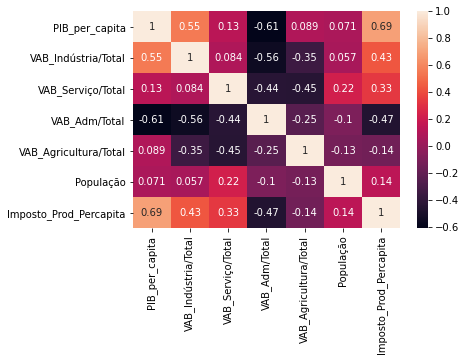

In [339]:
corrMatrix = df_quanti.corr()
heatmap = sns.heatmap(corrMatrix, annot=True)
#plt.show()
plt.savefig('C:/Users/90521463734/OneDrive - Receita Federal do Brasil/00_PREMIOTESOURONACIONAL/corr_matrix5.jpg',bbox_inches='tight', dpi = 100)

In [285]:
df_quanti.corr()

,PIB_per_capita,VAB_Indústria/Total,VAB_Serviço/Total,VAB_Adm/Total,VAB_Agricultura/Total,População,Imposto_Prod_Percapita
PIB_per_capita,1.000,0.549,0.126,-0.614,0.089,0.071,0.689
VAB_Indústria/Total,0.549,1.000,0.084,-0.556,-0.354,0.057,0.429
VAB_Serviço/Total,0.126,0.084,1.000,-0.441,-0.449,0.223,0.326
VAB_Adm/Total,-0.614,-0.556,-0.441,1.000,-0.247,-0.101,-0.468
VAB_Agricultura/Total,0.089,-0.354,-0.449,-0.247,1.000,-0.132,-0.144
População,0.071,0.057,0.223,-0.101,-0.132,1.000,0.136
Imposto_Prod_Percapita,0.689,0.429,0.326,-0.468,-0.144,0.136,1.000


# Criação de dataframe para uso no streamlit
Para melhor compreensão pelos usuários, criaremos o dataframe neste ponto, antes da criação das dummies.    
Se mostrarmos o dataset para o usuário com as dummies, poderá parecer confuso e de difícil entendimento.

In [286]:
df_streamlit = df.copy()
df_streamlit.head()

,Região,UF,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,Amazônia_Legal,Semiárido,Cid_Região_São_Paulo,PIB_per_capita,População,Capag,VAB_Indústria/Total,VAB_Serviço/Total,VAB_Adm/Total,VAB_Agricultura/Total,Imposto_Prod_Percapita
Município,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,Norte,Rondônia,0,do Entorno,do Entorno,Miss,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,21552,23167,<NA>,0.056,0.262,0.330,0.352,1219.882
Ariquemes,Norte,Rondônia,0,Polo,do Entorno,Miss,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,Sim,Não,Não,23206,106168,0,0.154,0.468,0.305,0.074,2376.046
Cabixi,Norte,Rondônia,0,do Entorno,do Entorno,Miss,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,25837,5438,0,0.038,0.187,0.313,0.462,1039.169
Cacoal,Norte,Rondônia,0,Polo,do Entorno,Miss,Centro Subregional B,Centro Subregional,Região Rural de Centro Sub-regional,Sim,Não,Não,25708,84813,1,0.114,0.497,0.281,0.109,2655.230
Cerejeiras,Norte,Rondônia,0,do Entorno,do Entorno,Miss,Centro de Zona B,Centro de Zona,Região Rural de Capital Regional,Sim,Não,Não,28714,16444,0,0.057,0.518,0.272,0.154,4187.728


In [287]:
df_streamlit.columns

Index(['Região', 'UF', 'Reg_Metropolitana', 'Mun_Reg_Geog_Imediata',
       'Mun_Reg_Geog_Intermediária', 'Tipo_Conc_Urbana', 'Hierarquia_Urbana',
       'Hier_Urbana_princ_categ', 'Região_rural', 'Amazônia_Legal',
       'Semiárido', 'Cid_Região_São_Paulo', 'PIB_per_capita', 'População',
       'Capag', 'VAB_Indústria/Total', 'VAB_Serviço/Total', 'VAB_Adm/Total',
       'VAB_Agricultura/Total', 'Imposto_Prod_Percapita'],
      dtype='object')

In [288]:
df_streamlit['Reg_Metropolitana'].value_counts()

0    4181
1    1389
Name: Reg_Metropolitana, dtype: int64

In [289]:
df_streamlit['Reg_Metropolitana'] = df_streamlit['Reg_Metropolitana'].replace({0:'Não', 1: 'Sim'})
df_streamlit['Tipo_Conc_Urbana'] = df_streamlit['Tipo_Conc_Urbana'].replace({'Miss':'<NA>'})
df_streamlit.head()

,Região,UF,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,Amazônia_Legal,Semiárido,Cid_Região_São_Paulo,PIB_per_capita,População,Capag,VAB_Indústria/Total,VAB_Serviço/Total,VAB_Adm/Total,VAB_Agricultura/Total,Imposto_Prod_Percapita
Município,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,Norte,Rondônia,Não,do Entorno,do Entorno,<NA>,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,21552,23167,<NA>,0.056,0.262,0.330,0.352,1219.882
Ariquemes,Norte,Rondônia,Não,Polo,do Entorno,<NA>,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,Sim,Não,Não,23206,106168,0,0.154,0.468,0.305,0.074,2376.046
Cabixi,Norte,Rondônia,Não,do Entorno,do Entorno,<NA>,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,25837,5438,0,0.038,0.187,0.313,0.462,1039.169
Cacoal,Norte,Rondônia,Não,Polo,do Entorno,<NA>,Centro Subregional B,Centro Subregional,Região Rural de Centro Sub-regional,Sim,Não,Não,25708,84813,1,0.114,0.497,0.281,0.109,2655.230
Cerejeiras,Norte,Rondônia,Não,do Entorno,do Entorno,<NA>,Centro de Zona B,Centro de Zona,Região Rural de Capital Regional,Sim,Não,Não,28714,16444,0,0.057,0.518,0.272,0.154,4187.728


In [290]:
df_streamlit['Reg_Metropolitana'].value_counts()

Não    4181
Sim    1389
Name: Reg_Metropolitana, dtype: int64

In [291]:
# Verificação dos valores únicos
[(df_streamlit[col].name, df_streamlit[col].unique()) for col in df_streamlit.columns]

[('Região',
  array(['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-oeste'],
        dtype=object)),
 ('UF',
  array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
         'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
         'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
         'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
         'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
         'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
        dtype=object)),
 ('Reg_Metropolitana', array(['Não', 'Sim'], dtype=object)),
 ('Mun_Reg_Geog_Imediata', array(['do Entorno', 'Polo'], dtype=object)),
 ('Mun_Reg_Geog_Intermediária', array(['do Entorno', 'Polo'], dtype=object)),
 ('Tipo_Conc_Urbana',
  array(['<NA>', 'Média concentração urbana', 'Grande concentração urbana'],
        dtype=object)),
 ('Hierarquia_Urbana',
  array(['Centro Local', 'Centro Subregional B', 'Centro de Zona B',
         'Centro de Zon

In [292]:
df_streamlit.isna().sum()

Região                           0
UF                               0
Reg_Metropolitana                0
Mun_Reg_Geog_Imediata            0
Mun_Reg_Geog_Intermediária       0
Tipo_Conc_Urbana                 0
Hierarquia_Urbana                0
Hier_Urbana_princ_categ          0
Região_rural                     0
Amazônia_Legal                   0
Semiárido                        0
Cid_Região_São_Paulo             0
PIB_per_capita                   0
População                        0
Capag                         1152
VAB_Indústria/Total              0
VAB_Serviço/Total                0
VAB_Adm/Total                    0
VAB_Agricultura/Total            0
Imposto_Prod_Percapita           0
dtype: int64

In [294]:
df_streamlit.describe()

,PIB_per_capita,População,Capag,VAB_Indústria/Total,VAB_Serviço/Total,VAB_Adm/Total,VAB_Agricultura/Total,Imposto_Prod_Percapita
count,5570.000,5570.000,4418.000,5570.000,5570.000,5570.000,5570.000,5570.000
mean,23513.443,37431.759,0.504,0.133,0.342,0.338,0.187,1951.098
std,24238.467,219969.003,0.500,0.140,0.134,0.175,0.153,3530.784
min,4788.000,786.000,0.000,0.012,0.021,0.018,0.000,17.553
25%,9880.250,5454.000,0.000,0.043,0.240,0.190,0.068,435.002
50%,17433.500,11590.500,1.000,0.070,0.318,0.305,0.141,962.439
75%,28729.250,25295.500,1.000,0.170,0.429,0.479,0.283,2204.083
max,583171.000,12176866.000,1.000,0.938,0.898,0.883,0.852,76589.687


In [295]:
df_streamlit = df_streamlit.reindex(['Região', 'UF', 'Reg_Metropolitana', 'Mun_Reg_Geog_Imediata',
       'Mun_Reg_Geog_Intermediária', 'Tipo_Conc_Urbana', 'Hierarquia_Urbana',
       'Hier_Urbana_princ_categ', 'Região_rural', 'Amazônia_Legal',
       'Semiárido', 'Cid_Região_São_Paulo', 'PIB_per_capita', 
       'VAB_Indústria/Total', 'VAB_Serviço/Total', 'VAB_Adm/Total',
       'VAB_Agricultura/Total','População','Imposto_Prod_Percapita','Capag'], axis = 1)
df_streamlit.head(2)

,Região,UF,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,Amazônia_Legal,Semiárido,Cid_Região_São_Paulo,PIB_per_capita,VAB_Indústria/Total,VAB_Serviço/Total,VAB_Adm/Total,VAB_Agricultura/Total,População,Imposto_Prod_Percapita,Capag
Município,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,Norte,Rondônia,Não,do Entorno,do Entorno,<NA>,Centro Local,Centro Local,Região Rural de Capital Regional,Sim,Não,Não,21552,0.056,0.262,0.330,0.352,23167,1219.882,<NA>
Ariquemes,Norte,Rondônia,Não,Polo,do Entorno,<NA>,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,Sim,Não,Não,23206,0.154,0.468,0.305,0.074,106168,2376.046,0


In [296]:
df_streamlit.describe()

,PIB_per_capita,VAB_Indústria/Total,VAB_Serviço/Total,VAB_Adm/Total,VAB_Agricultura/Total,População,Imposto_Prod_Percapita,Capag
count,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,4418.000
mean,23513.443,0.133,0.342,0.338,0.187,37431.759,1951.098,0.504
std,24238.467,0.140,0.134,0.175,0.153,219969.003,3530.784,0.500
min,4788.000,0.012,0.021,0.018,0.000,786.000,17.553,0.000
25%,9880.250,0.043,0.240,0.190,0.068,5454.000,435.002,0.000
50%,17433.500,0.070,0.318,0.305,0.141,11590.500,962.439,1.000
75%,28729.250,0.170,0.429,0.479,0.283,25295.500,2204.083,1.000
max,583171.000,0.938,0.898,0.883,0.852,12176866.000,76589.687,1.000


In [337]:
df_streamlit.to_excel('df_streamlit.xlsx')

# AED target

# AED das variáveis quantitativas

In [298]:
df.select_dtypes('float64').columns

Index(['VAB_Indústria/Total', 'VAB_Serviço/Total', 'VAB_Adm/Total',
       'VAB_Agricultura/Total', 'Imposto_Prod_Percapita'],
      dtype='object')

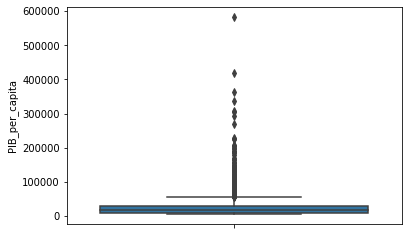

In [299]:
sns.boxplot(y = df['PIB_per_capita'])
plt.savefig('boxplot_PIB_per_capita.jpg',bbox_inches='tight', dpi = 100)

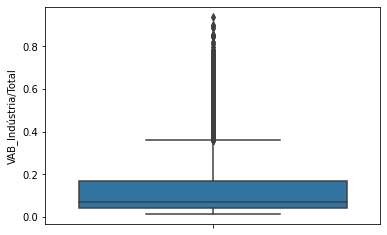

In [300]:
sns.boxplot(y = df['VAB_Indústria/Total'])
plt.savefig('boxplot_VAB_Indústria_Total.jpg',bbox_inches='tight', dpi = 100)

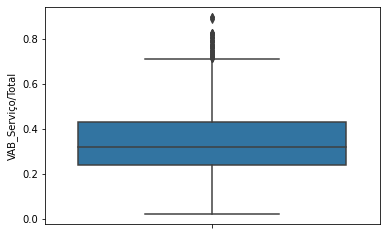

In [301]:
sns.boxplot(y = df['VAB_Serviço/Total'])
plt.savefig('boxplot_VAB_Serviço_Total.jpg',bbox_inches='tight', dpi = 100)

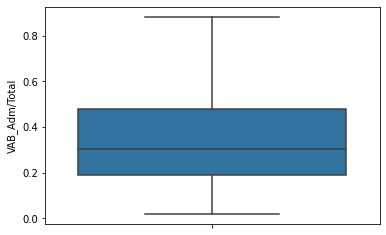

In [302]:
sns.boxplot(y = df['VAB_Adm/Total'])
plt.savefig('boxplot_VAB_Adm_Total.jpg',bbox_inches='tight', dpi = 100)

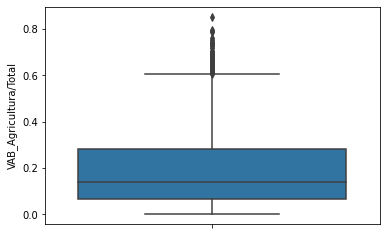

In [304]:
sns.boxplot(y = df['VAB_Agricultura/Total'])
plt.savefig('boxplot_VAB_Agricultura_Total.jpg',bbox_inches='tight', dpi = 100)

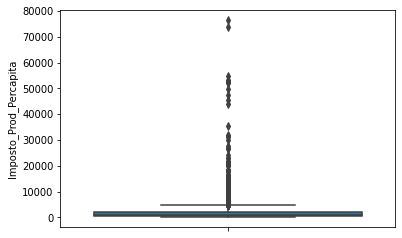

In [306]:
sns.boxplot(y = df['Imposto_Prod_Percapita'])
plt.savefig('boxplot_Imposto_Prod_Percapita.jpg',bbox_inches='tight', dpi = 100)

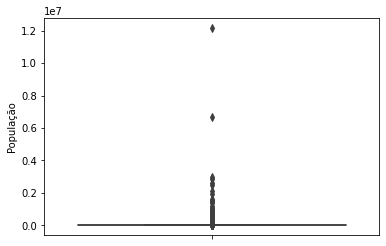

In [307]:
sns.boxplot(y = df['População'])
plt.savefig('População.jpg',bbox_inches='tight', dpi = 100)

## Tratamento das variáveis categóricas

### Verificação dos valores únicos
Constata-se que a variável 'Região Metropolitana' já está com o formato adequado, não necessitando tratamento.  
Os valores da variável 'Região Rural' também iniciam com 'Região Rural'. Consequentemente, quando criarmos dummies o nome dessas  
ficará poluído. Vamos retirar a expressão 'Região Rural' do inicio do nome dos valores desta variável.

In [308]:
[(df[col].name, df[col].value_counts()) for col in df.select_dtypes(object).columns]

[('Região',
  Nordeste        1794
  Sudeste         1668
  Sul             1191
  Centro-oeste     467
  Norte            450
  Name: Região, dtype: int64),
 ('UF',
  Minas Gerais           853
  São Paulo              645
  Rio Grande do Sul      497
  Bahia                  417
  Paraná                 399
  Santa Catarina         295
  Goiás                  246
  Piauí                  224
  Paraíba                223
  Maranhão               217
  Pernambuco             185
  Ceará                  184
  Rio Grande do Norte    167
  Pará                   144
  Mato Grosso            141
  Tocantins              139
  Alagoas                102
  Rio de Janeiro          92
  Mato Grosso do Sul      79
  Espírito Santo          78
  Sergipe                 75
  Amazonas                62
  Rondônia                52
  Acre                    22
  Amapá                   16
  Roraima                 15
  Distrito Federal         1
  Name: UF, dtype: int64),
 ('Reg_Metropolitana',
 

### Tratamento da variável 'Região_rural'

In [309]:
df['Região_rural'].value_counts()

Região Rural de Capital Regional             3240
Região Rural de Centro Sub-regional          1002
Região Rural de Metrópole                     814
Região Rural de Centro de zona                194
Região Rural de Grande Metrópole Nacional     181
Região Rural de Metrópole Nacional            139
Name: Região_rural, dtype: int64

In [310]:
df['Região_rural'] = df['Região_rural'].str.replace('Região Rural de ', '')
df['Região_rural'].value_counts()

Capital Regional             3240
Centro Sub-regional          1002
Metrópole                     814
Centro de zona                194
Grande Metrópole Nacional     181
Metrópole Nacional            139
Name: Região_rural, dtype: int64

### Transformação das categóricas em dummies

#### Identificação das variáveis a serem convertidas em dummies

In [311]:
df.select_dtypes('object').columns

Index(['Região', 'UF', 'Reg_Metropolitana', 'Mun_Reg_Geog_Imediata',
       'Mun_Reg_Geog_Intermediária', 'Tipo_Conc_Urbana', 'Hierarquia_Urbana',
       'Hier_Urbana_princ_categ', 'Região_rural', 'Amazônia_Legal',
       'Semiárido', 'Cid_Região_São_Paulo'],
      dtype='object')

In [312]:
# Conversão das categóricas em dummies
df = pd.get_dummies(data = df, columns = ['Região', 'UF', 'Reg_Metropolitana', 'Mun_Reg_Geog_Imediata',
       'Mun_Reg_Geog_Intermediária', 'Tipo_Conc_Urbana', 'Hierarquia_Urbana',
       'Hier_Urbana_princ_categ', 'Região_rural', 'Amazônia_Legal',
       'Semiárido', 'Cid_Região_São_Paulo'],                
                    drop_first=True)

In [313]:
df.columns

Index(['PIB_per_capita', 'População', 'Capag', 'VAB_Indústria/Total',
       'VAB_Serviço/Total', 'VAB_Adm/Total', 'VAB_Agricultura/Total',
       'Imposto_Prod_Percapita', 'Região_Nordeste', 'Região_Norte',
       'Região_Sudeste', 'Região_Sul', 'UF_Alagoas', 'UF_Amapá', 'UF_Amazonas',
       'UF_Bahia', 'UF_Ceará', 'UF_Distrito Federal', 'UF_Espírito Santo',
       'UF_Goiás', 'UF_Maranhão', 'UF_Mato Grosso', 'UF_Mato Grosso do Sul',
       'UF_Minas Gerais', 'UF_Paraná', 'UF_Paraíba', 'UF_Pará',
       'UF_Pernambuco', 'UF_Piauí', 'UF_Rio Grande do Norte',
       'UF_Rio Grande do Sul', 'UF_Rio de Janeiro', 'UF_Rondônia',
       'UF_Roraima', 'UF_Santa Catarina', 'UF_Sergipe', 'UF_São Paulo',
       'UF_Tocantins', 'Reg_Metropolitana_1',
       'Mun_Reg_Geog_Imediata_do Entorno',
       'Mun_Reg_Geog_Intermediária_do Entorno', 'Tipo_Conc_Urbana_Miss',
       'Tipo_Conc_Urbana_Média concentração urbana',
       'Hierarquia_Urbana_Capital Regional C',
       'Hierarquia_Urbana_Centro 

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, Alta Floresta D'Oeste to Brasília
Data columns (total 71 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   PIB_per_capita                                      5570 non-null   int32  
 1   População                                           5570 non-null   int64  
 2   Capag                                               4418 non-null   Int64  
 3   VAB_Indústria/Total                                 5570 non-null   float64
 4   VAB_Serviço/Total                                   5570 non-null   float64
 5   VAB_Adm/Total                                       5570 non-null   float64
 6   VAB_Agricultura/Total                               5570 non-null   float64
 7   Imposto_Prod_Percapita                              5570 non-null   float64
 8   Região_Nordeste                                     5570 no

## Preparação final do dataset para os modelos de ML

### Verificação de valores faltantes
Verifica-se que só há valores faltantes na varivel target

In [315]:
df_missing = pd.DataFrame(df.isna().sum(), columns = ['Missing'])
df_missing[df_missing['Missing']>0]

,Missing
Capag,1152


In [316]:
df['Capag'].value_counts(dropna=False)

1      2228
0      2190
NaN    1152
Name: Capag, dtype: Int64

In [317]:
df_completo = df.copy()
df_completo.shape

(5570, 71)

In [318]:
df.isna().sum()

PIB_per_capita                                           0
População                                                0
Capag                                                 1152
VAB_Indústria/Total                                      0
VAB_Serviço/Total                                        0
VAB_Adm/Total                                            0
VAB_Agricultura/Total                                    0
Imposto_Prod_Percapita                                   0
Região_Nordeste                                          0
Região_Norte                                             0
Região_Sudeste                                           0
Região_Sul                                               0
UF_Alagoas                                               0
UF_Amapá                                                 0
UF_Amazonas                                              0
UF_Bahia                                                 0
UF_Ceará                                                

In [319]:
df_sem_na = df.dropna(axis = 0)
df_sem_target_na = df_sem_na
df_sem_na.shape

(4418, 71)

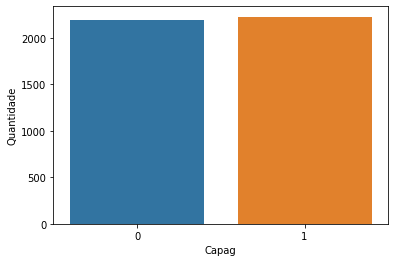

In [320]:
sns.countplot(x = df_sem_target_na["Capag"]).set_ylabel('Quantidade')
plt.savefig('graf_barros_capag.jpg',bbox_inches='tight', dpi = 100)

In [321]:
df_sem_target_na["Capag"].value_counts()

1    2228
0    2190
Name: Capag, dtype: Int64

In [322]:
df['Capag'].value_counts(dropna=False)

1      2228
0      2190
NaN    1152
Name: Capag, dtype: Int64

In [323]:
df1_missing = pd.DataFrame(df.isna().sum(), columns = ['Missing'])
df1_missing[df1_missing['Missing']>0]

,Missing
Capag,1152


# AED bivariada

In [324]:
df_sem_target_na['Capag'].value_counts(dropna = False)

1      2228
0      2190
NaN       0
Name: Capag, dtype: Int64

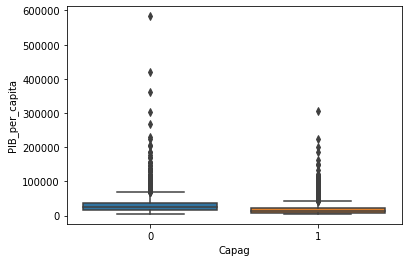

In [325]:
sns.boxplot(x = df_sem_target_na['Capag'], y = df_sem_target_na['PIB_per_capita'])
plt.savefig('boxplot_Capag_X_PIB__per_capita.jpg',bbox_inches='tight', dpi = 100)

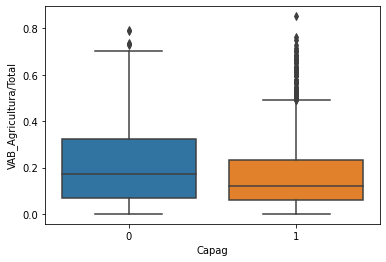

In [326]:
sns.boxplot(x = df_sem_target_na['Capag'], y = df_sem_target_na['VAB_Agricultura/Total'])
plt.savefig('boxplot_Capag_X_VAB_Agricultura_Total.jpg',bbox_inches='tight', dpi = 100)

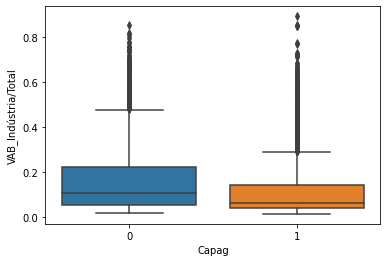

In [327]:
sns.boxplot(x = df_sem_target_na['Capag'], y = df_sem_target_na['VAB_Indústria/Total'])
plt.savefig('boxplot_Capag_X_VAB_Indústria_Total.jpg',bbox_inches='tight', dpi = 100)

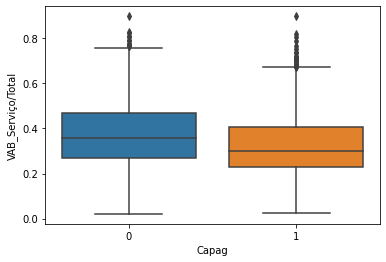

In [328]:
sns.boxplot(x = df_sem_target_na['Capag'], y = df_sem_target_na['VAB_Serviço/Total'])
plt.savefig('boxplot_Capag_X_VAB_Serviço_Total.jpg',bbox_inches='tight', dpi = 100)

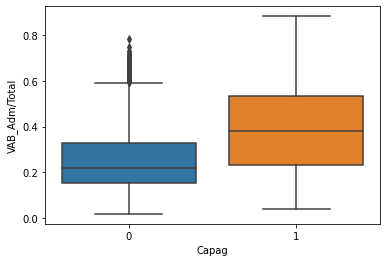

In [332]:
sns.boxplot(x = df_sem_target_na['Capag'], y = df_sem_target_na['VAB_Adm/Total'])
plt.savefig('boxplot_Capag_X_VAB_Adm_Total.jpg',bbox_inches='tight', dpi = 100)

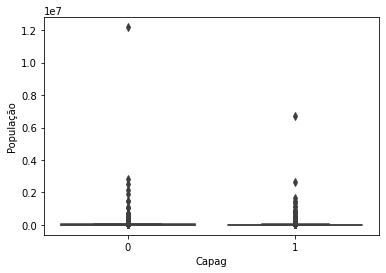

In [333]:
sns.boxplot(x = df_sem_target_na['Capag'], y = df_sem_target_na['População'])
plt.savefig('boxplot_Capag_X_População.jpg',bbox_inches='tight', dpi = 100)

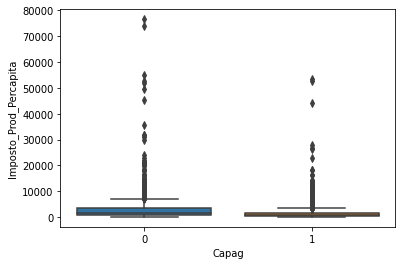

In [334]:
sns.boxplot(x = df_sem_target_na['Capag'], y = df_sem_target_na['Imposto_Prod_Percapita'])
plt.savefig('boxplot_Capag_X_Imposto_Prod_Percapita.jpg',bbox_inches='tight', dpi = 100)

In [335]:
# No arquivo abaixo, foram excluídas linhas em que o valor da target era nulo, por não ter sido calculado pela STN por falta de documentos.
df_sem_target_na.to_excel('df_sem_target_nan.xlsx', index = False)

In [336]:
# Abaixo está o arquivo com todas as linhas, inclusive aquelas em que não havia valor de Capag calculado.
df_completo.to_excel('df_completo.xlsx', index = False)